# Task 1

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

In [2]:
boston = load_boston()

In [3]:
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = pd.DataFrame(boston.target, columns=['price'])

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
scaler = StandardScaler()

In [6]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=boston.feature_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=boston.feature_names)

In [7]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

In [8]:
X_train_tsne = tsne.fit_transform(X_train_scaled)

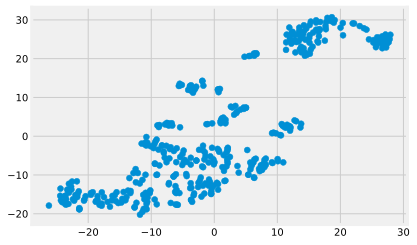

In [9]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

# Task 2

In [10]:
from sklearn.cluster import KMeans

In [11]:
model = KMeans(n_clusters=3, random_state=42, max_iter=100)

In [31]:
boston_labels = model.fit_predict(X_train_tsne)

array([1, 2, 0, 1, 2, 0, 2, 0, 1, 1, 2, 2, 2, 1, 2, 2, 2, 0, 0, 0, 1, 2,
       0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 1, 2, 0, 0, 2, 2, 0, 0, 2, 1, 0,
       2, 1, 2, 2, 1, 1, 0, 2, 0, 2, 1, 1, 0, 1, 2, 0, 2, 2, 2, 2, 2, 1,
       2, 0, 2, 2, 2, 2, 1, 2, 2, 2, 0, 0, 2, 1, 1, 1, 2, 2, 1, 2, 1, 0,
       1, 2, 2, 1, 1, 0, 0, 2, 1, 2, 0, 2, 2, 0, 0, 0, 2, 2, 0, 2, 0, 2,
       1, 0, 2, 0, 0, 1, 1, 1, 2, 2, 2, 1, 1, 2, 0, 2, 1, 0, 0, 1, 0, 2,
       2, 2, 0, 1, 2, 0, 2, 2, 2, 1, 2, 2, 0, 1, 2, 0, 2, 2, 2, 1, 0, 0,
       0, 1, 2, 1, 2, 1, 0, 2, 2, 2, 2, 0, 0, 2, 0, 2, 2, 0, 0, 1, 0, 0,
       1, 1, 0, 2, 0, 2, 1, 2, 2, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 2, 2, 2,
       0, 2, 1, 1, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 1, 2, 2, 0, 1, 2, 1,
       1, 2, 1, 0, 2, 0, 0, 2, 0, 2, 1, 2, 0, 2, 2, 2, 2, 1, 0, 2, 2, 0,
       0, 1, 1, 2, 0, 1, 1, 2, 2, 0, 1, 0, 0, 1, 2, 2, 1, 2, 1, 2, 2, 0,
       2, 0, 2, 2, 2, 2, 0, 1, 2, 1, 2, 2, 0, 2, 1, 2, 0, 2, 2, 1, 0, 0,
       1, 0, 0, 2, 2, 0, 1, 1, 1, 2, 0, 1, 2, 2, 2,

Text(0.5, 1.0, 'Boston clustering_train')

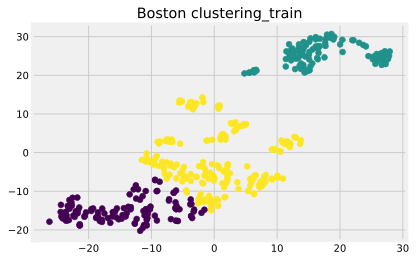

In [53]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=boston_labels )
plt.title('Boston clustering_train')

In [43]:
CRIM_1 = X_train.loc[boston_labels==0, "CRIM"].mean()
price_1 = y_train.loc[boston_labels==0, "price"].mean()
CRIM_1, price_1

(0.08557826086956521, 25.99304347826087)

In [44]:
CRIM_2 = X_train.loc[boston_labels==1, "CRIM"].mean()
price_2 = y_train.loc[boston_labels==1, "price"].mean()
CRIM_2, price_2

(13.17982178217822, 16.277227722772285)

In [45]:
CRIM_3 = X_train.loc[boston_labels==2, "CRIM"].mean()
price_3 = y_train.loc[boston_labels==2, "price"].mean()
CRIM_3,price_3

(0.6227811170212766, 24.343617021276597)

# Task 3

In [46]:
X_test_tsne = tsne.fit_transform(X_test_scaled)

In [55]:
boston_labels_test = model.fit_predict(X_test_tsne)

Text(0.5, 1.0, 'Boston clustering_test')

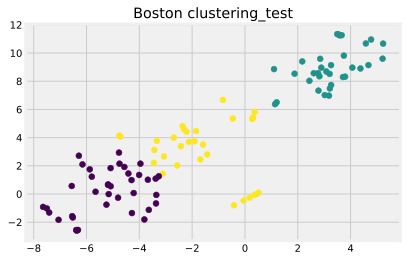

In [54]:
plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=boston_labels_test )
plt.title('Boston clustering_test')

In [56]:
CRIM_1 = X_test.loc[boston_labels_test==0, "CRIM"].mean()
price_1 = y_test.loc[boston_labels_test==0, "price"].mean()
CRIM_1, price_1

(0.12544842105263154, 26.84736842105263)

In [57]:
CRIM_2 = X_test.loc[boston_labels_test==1, "CRIM"].mean()
price_2 = y_test.loc[boston_labels_test==1, "price"].mean()
CRIM_2, price_2

(10.707682121212121, 16.421212121212122)

In [58]:
CRIM_3 = X_test.loc[boston_labels_test==2, "CRIM"].mean()
price_3 = y_test.loc[boston_labels_test==2, "price"].mean()
CRIM_3, price_3

(0.3947103225806451, 20.312903225806448)